In [34]:
import os
os.getcwd()
os.chdir('C:\\Users\\laptop\\Desktop\\Assignments 1160')

In [35]:
#import packages
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('sales_train_v2.csv')
df = df[df['item_cnt_day'].notnull()  & (df['shop_id'] == 25) & df['item_cnt_day'] > 0  ]
df['date'] = pd.to_datetime(df.date,format='%d.%m.%Y')
df = df.groupby('date').item_cnt_day.sum().reset_index()

#print the head
df.head()

,date,item_cnt_day
0,2013-01-02,568.0
1,2013-01-03,375.0
2,2013-01-04,377.0
3,2013-01-05,315.0
4,2013-01-06,374.0


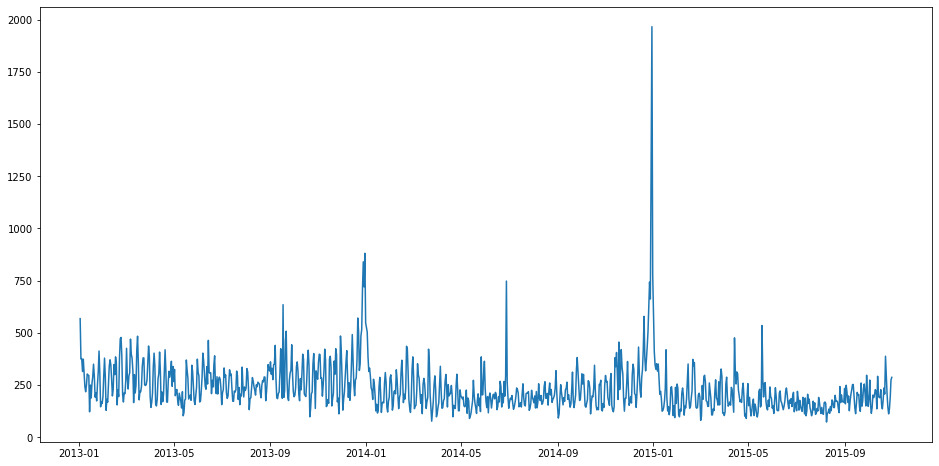

In [36]:
#setting index as date

df.index = df['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['item_cnt_day'], label='item_cnt_day')

In [37]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
# df = pd.read_csv('NSE-TATAGLOBAL11.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'item_cnt_day'])

for i in range(0,len(data)):
     new_data['date'][i] = data['date'][i]
     new_data['item_cnt_day'][i] = data['item_cnt_day'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will 
#destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data 
#before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['item_cnt_day'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['item_cnt_day'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

                 date  item_cnt_day
date                               
2013-01-02 2013-01-02         568.0
2013-01-03 2013-01-03         375.0
2013-01-04 2013-01-04         377.0
2013-01-05 2013-01-05         315.0
2013-01-06 2013-01-06         374.0

 Shape of the data:
(1030, 2)

 Shape of training set:
(987, 2)

 Shape of validation set:
(43, 2)

 RMSE value on validation set:
62.70117467423649


C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


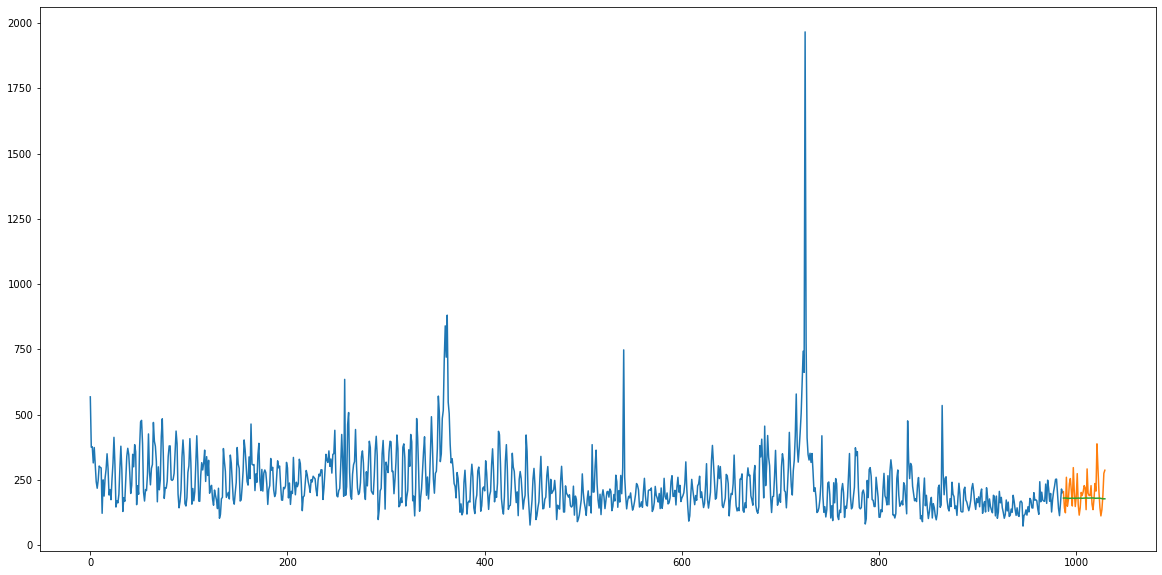

In [38]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['item_cnt_day'])
plt.plot(valid[['item_cnt_day', 'Predictions']])

In [39]:
#Linear Regression Development
#setting index as date values
df['date'] = pd.to_datetime(df.date,format='%Y.%m.%d')
df.index = df['date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'item_cnt_day'])

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['item_cnt_day'][i] = data['item_cnt_day'][i]

In [40]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data, 'date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [41]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('item_cnt_day', axis=1)
y_train = train['item_cnt_day']
x_valid = valid.drop('item_cnt_day', axis=1)
y_valid = valid['item_cnt_day']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

58.840142029989764

C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


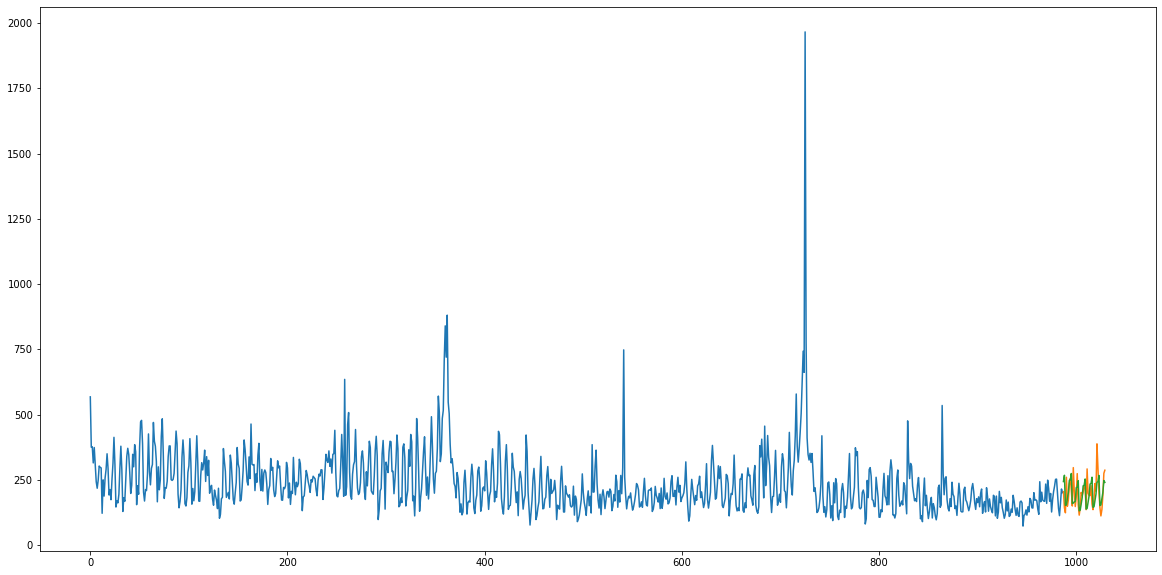

In [44]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['item_cnt_day'])
plt.plot(valid[['item_cnt_day', 'Predictions']])

In [45]:
#k-nearest neighbors
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [46]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\Users\laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

112.18887686007389

C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


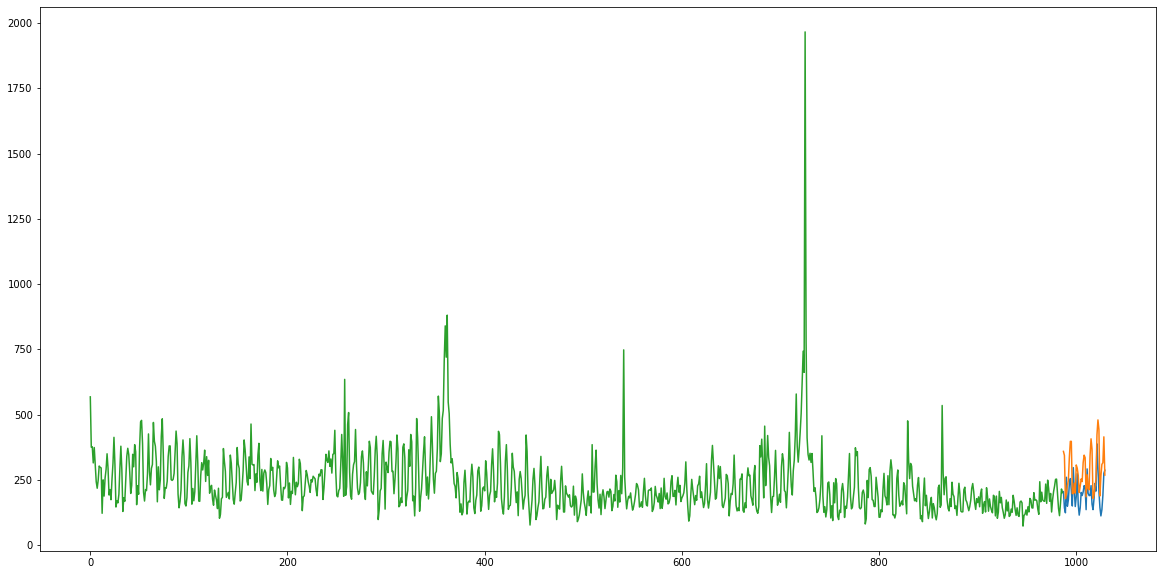

In [48]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['item_cnt_day', 'Predictions']])
plt.plot(train['item_cnt_day'])

In [50]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'item_cnt_day'])

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['item_cnt_day'][i] = data['item_cnt_day'][i]

new_data['date'] = pd.to_datetime(new_data.date,format='%Y.%m.%d')
new_data.index = new_data['date']

#preparing data
new_data.rename(columns={'item_cnt_day': 'y', 'date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
new_data.head()

,ds,y
date,,
2013-01-02,2013-01-02,568
2013-01-03,2013-01-03,375
2013-01-04,2013-01-04,377
2013-01-05,2013-01-05,315
2013-01-06,2013-01-06,374


In [52]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

57.886838164921

C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


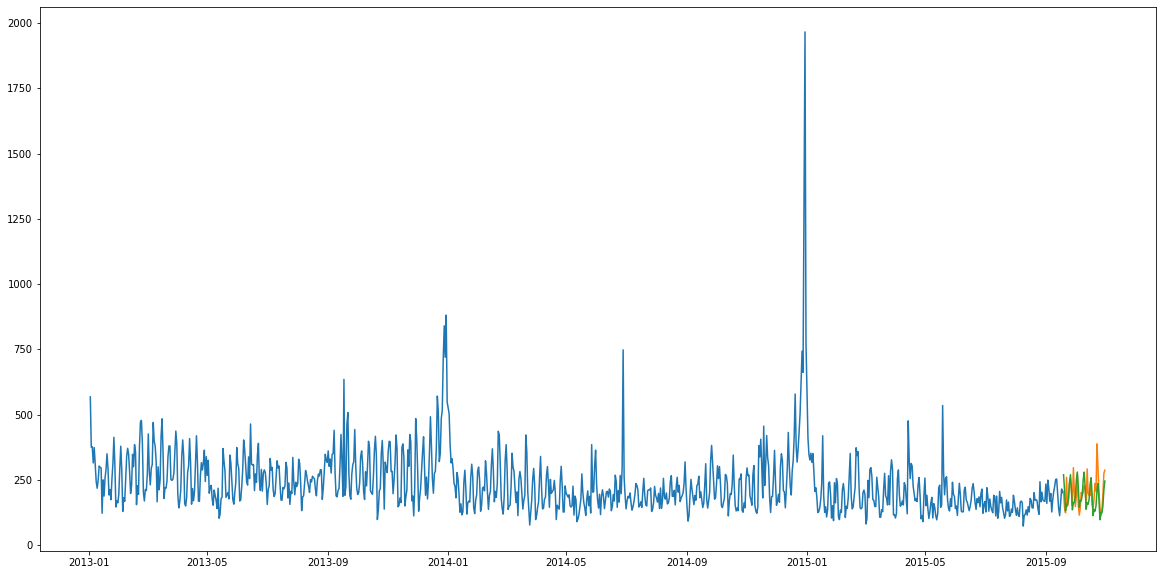

In [53]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [54]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'item_cnt_day'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['item_cnt_day'][i] = data['item_cnt_day'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:700,:]
valid = dataset[700:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 43s - loss: 0.0027


In [55]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

142.21070848986264

C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


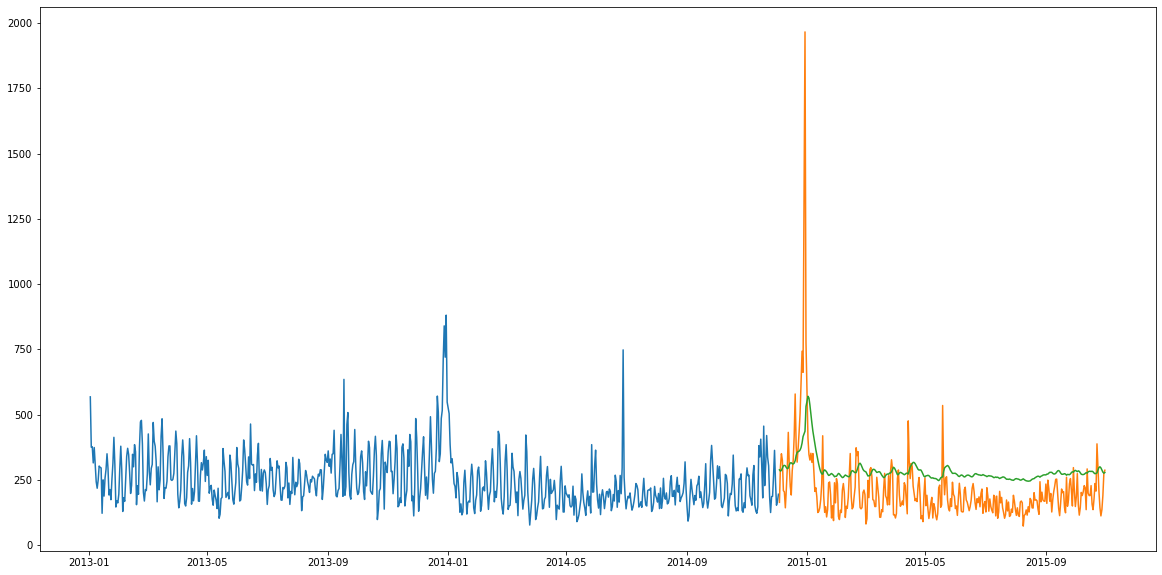

In [57]:
#for plotting
train = new_data[:700]
valid = new_data[700:]
valid['Predictions'] = closing_price
plt.plot(train['item_cnt_day'])
plt.plot(valid[['item_cnt_day','Predictions']])